In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import glob
from math import ceil, floor, sqrt

In [100]:
class CUBE(object):
  def __init__(self, fname):
    f = open(fname, 'r')
    for i in range(2): f.readline() # echo comment
    tkns = f.readline().split() # number of atoms included in the file followed by the position of the origin of the volumetric data
    self.natoms = int(tkns[0])
    self.origin = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
    tkns = f.readline().split() #
    self.NX = int(tkns[0])
    self.X = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
    tkns = f.readline().split() #
    self.NY = int(tkns[0])
    self.Y = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
    tkns = f.readline().split() #
    self.NZ = int(tkns[0])
    self.Z = np.array([float(tkns[1]),float(tkns[2]),float(tkns[3])])
    self.atoms = []
    for i in range(self.natoms):
      tkns = f.readline().split()
      self.atoms.append([float(tkns[0]), float(tkns[2]), float(tkns[3]), float(tkns[4])])
    self.atoms = np.array(self.atoms)
    self.data = np.zeros((self.NX,self.NY,self.NZ))
    i=0
    for s in f:
      for v in s.split():
        self.data[i//(self.NY*self.NZ), (i//self.NZ)%self.NY, i%self.NZ] = float(v)
        i+=1
    if i != self.NX*self.NY*self.NZ: raise NameError("FSCK!")

In [124]:
cube = CUBE('empty.cube')

In [104]:
def get_energies_fast(coords, zs, rhotilde, NX, NY, NZ, X, Y, Z):
    dv = X[0]*Y[1]*Z[2]
    X, Y, Z = np.mgrid[0:X[0]*(NX-1):complex(NX), 0:Y[1]*(NY-1):complex(NY), 0:Z[2]*(NZ-1):complex(NZ)]
    positions = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T 
    energies = np.zeros(len(zs))
    for site in range(len(zs)):
        energies[site] += np.sum(zs[site] * rhotilde.ravel() / np.linalg.norm(positions - coords[site], axis=1))
    return energies*dv
lookup = {1: 'H', 6: 'C', 7: 'N', 8: 'O'}
rlookup = {'C': 6, 'O': 8, 'N': 7, 'B': 5, 'H': 1}
def read_xyz(fn):
    lines = open(fn).readlines()[2:]
    elements = []
    coords = []
    for line in lines:
        parts = line.strip().split()
        elements.append(rlookup[parts[0]])
        coords.append([float(_) for _ in parts[1:]])
    return elements, coords

In [123]:
get_energies_fast(cube.atoms[:,1:], cube.atoms[:, 0], cube.data, cube.NX, cube.NY, cube.NZ, cube.X, cube.Y, cube.Z)

array([47.98593605, 47.98619494])

In [15]:
def resample(rho, npoints, NX, NY, NZ, X, Y, Z):
    Xs, Ys, Zs = np.mgrid[0:(NX-1):complex(npoints), 0:(NY-1):complex(npoints), 0:(NZ-1):complex(npoints)]
    positions = np.vstack([Xs.ravel(), Ys.ravel(), Zs.ravel()])
    newrho = snd.map_coordinates(rho, positions, mode='nearest', order=3)
    return newrho.reshape(npoints, npoints, npoints), npoints, npoints, npoints, X*NX/npoints, Y*NY/npoints, Z*NZ/npoints    

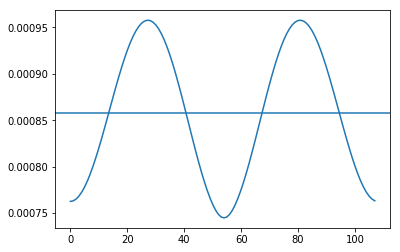

In [129]:
plt.plot(cube.data.mean(axis=0).mean(axis=1))
plt.axhline(cube.data.mean())

In [133]:
10**-3/27/9/4

1.02880658436214e-06